In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
import time
import bisect
from scipy.spatial.distance import cdist
from scipy.sparse import coo_matrix
#np.random.seed(11)


In [2]:
class Node:
    def __init__(self, name, x, y):
        self.name = name
        self.x = x
        self.y = y
        
    def __str__(self):
        return '({}, {}, {})'.format(self.name, self.x, self.y)
    
    

        
class Edge:
    def __init__(self, a, b, weight):
        self.a = a
        self.b = b
        self.weight = weight
        
    def __leq__(self, other):
        return self.weight <= other.weight
    def __geq__(self, other):
        return self.weight >= other.weight
    def __eq__(self, other):
        return self.weight == other.weight
    def __lt__(self, other):
        return self.weight < other.weight
    def __gt__(self, other):
        return self.weight > other.weight
    def __str__(self):
        return '({}, {}, {})'.format(self.a.name, self.b.name, self.weight)

class Graph:
    def __init__(self, nodes, edges, adjacency_list):
        self.nodes = nodes
        self.edges = edges
        self.adjacency_list = adjacency_list
    

In [3]:
def gaussian_clusters(num_points, num_clusters, standard_deviation):
    cluster_size = num_points // num_clusters
    centers = np.random.randn(num_clusters, 2)
    points = np.vstack([center + standard_deviation*np.random.randn(cluster_size,2) for center in centers])
    return points

In [4]:
num_points = 1000
num_clusters = 5

X = gaussian_clusters(num_points = num_points, num_clusters = num_clusters, standard_deviation = 0.1)

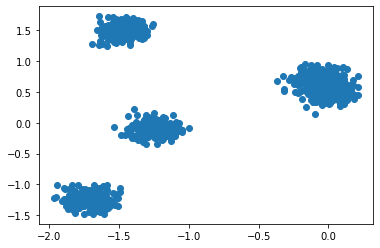

In [5]:
plt.scatter(*X.T)

In [6]:
dist = cdist(X,X)

In [7]:
start_time = time.time()
nodes = []
for name, x in enumerate(X):
    nodes.append(Node(name, x[0], x[1]))
print('My MST: ' + "--- %s seconds ---" % (time.time() - start_time))



start_time = time.time()
edges = []
for i in range(len(dist)):
    for j in range(len(dist)):
        edges.append(Edge(nodes[i], nodes[j], dist[i, j]))
print('My MST: ' + "--- %s seconds ---" % (time.time() - start_time))
#edges.sort()

My MST: --- 0.0011429786682128906 seconds ---
My MST: --- 1.465165138244629 seconds ---


# Adjecency list

In [9]:
from heapq import heapify, heappush, heappop


start_time = time.time()
    
adj_list = {}
for index, edge in enumerate(edges):
    if(edge.a in adj_list.keys()):
        adj_list[edge.a].append(edge)
        #bisect.insort(adj_list[edge.a], edge)
    else:
        adj_list[edge.a] = [edge]
for i in adj_list.keys():
    heapify(adj_list[i])
        

print('Create Adjacencylist: ' + "--- %s seconds ---" % (time.time() - start_time))

graph = Graph(nodes, edges, adj_list)

Create Adjacencylist: --- 0.47639894485473633 seconds ---


In [10]:
edges_tree_names = []
def prims_ny1(graph_matrix):
    
    row = []
    column = []
    data = []
    dimension = len(graph_matrix)
    
    mst_nodes= [nodes[0]]
    
    
    
    while len(mst_nodes) < dimension:
        
        smallest_weight = math.inf
        best_node = None
        best_edge = None
        counter = 1
        
        for i in range(dimension-1):   
            if(best_node is not None):
                break
            
            for node in mst_nodes:
                
                
                if((adj_list[node][i].weight < smallest_weight)):
                    if(adj_list[node][i].b not in mst_nodes):

                        smallest_weight = adj_list[node][i].weight
                        best_node = adj_list[node][i].b
                        best_edge = adj_list[node][i]
                        
        
        if(best_node is not None):
            mst_nodes.append(best_node)
            
        row.append(best_edge.a.name)
        column.append(best_edge.b.name)
        data.append(best_edge.weight)
        edges_tree.append([best_edge.a.name, best_edge.b.name])
    
    return coo_matrix((data, (row, column)), shape=graph_matrix.shape)



In [11]:

start_time = time.time()
mst = prims_ny1(dist)
print('My MST: ' + "--- %s seconds ---" % (time.time() - start_time))

np_dist = np.array(dist)
G = nx.convert_matrix.from_numpy_matrix(np_dist)

start_time = time.time()
nx.minimum_spanning_tree(G)
print('NetworkX: ' + "--- %s seconds ---" % (time.time() - start_time))

My MST: --- 8.272353887557983 seconds ---
NetworkX: --- 1.347571849822998 seconds ---


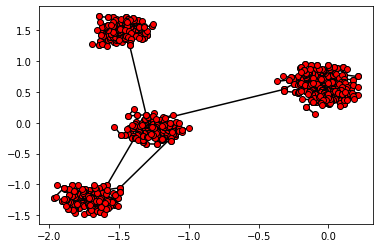

In [12]:
x = X[:,0].flatten()
y = X[:,1].flatten()
plot_edges = np.array(edges_tree_names)

plt.plot(x[plot_edges.T], y[plot_edges.T], linestyle='-', color='black',
        markerfacecolor='red', marker='o')


plt.show()

In [13]:
'''clusters = {}
def single_linkage(num_clusters):
    edge_list = edges
    #print(edge_list)
    for cluster in range(num_clusters -1):
        longest_edge = []
        longest_distance = 0
        for i in edges:
            
            if(dist[i[0], i[1]] > longest_distance):
                longest_edge = i
                longest_distance = dist[i[0], i[1]]
        #print(longest_edge, longest_distance)
        clusters[cluster] = longest_edge[0]
        clusters[cluster+1] = longest_edge[1]
        edge_list.remove(longest_edge)
        #print(edge_list)
    return edge_list'''

'clusters = {}\ndef single_linkage(num_clusters):\n    edge_list = edges\n    #print(edge_list)\n    for cluster in range(num_clusters -1):\n        longest_edge = []\n        longest_distance = 0\n        for i in edges:\n            \n            if(dist[i[0], i[1]] > longest_distance):\n                longest_edge = i\n                longest_distance = dist[i[0], i[1]]\n        #print(longest_edge, longest_distance)\n        clusters[cluster] = longest_edge[0]\n        clusters[cluster+1] = longest_edge[1]\n        edge_list.remove(longest_edge)\n        #print(edge_list)\n    return edge_list'

In [14]:
cluster_roots = {}
def single_linkage(num_clusters):
    edge_list = edges_tree
    
    for cluster in range(num_clusters -1):
        longest_edge = None
        longest_distance = 0
        for i in edges_tree:
            
            if(dist[i[0], i[1]] > longest_distance):
                longest_edge = i
                longest_distance = dist[i[0], i[1]]
        
        clusters[cluster] = longest_edge[0]
        clusters[cluster+1] = longest_edge[1]
        edge_list.remove(longest_edge)
        
    return edge_list

In [15]:
def connected_nodes(node, node_list):
    return_list = []
    for i in edges:
        if(i[0] == node):
            return_list.append([node, i[1]])
            connected_nodes(node)
        if(i[1] == node):
            return_list.append([node, i[0]])
    
    return return_list

In [ ]:
clusters = {}
def make_clusters():
    clusters = cluster_roots
    
    for edge in edges:
        for i in clusters.keys():
            if(edge.a.name in clusters[i]):
                clusters[i].append(edge.b)
                
        

{0: 32, 1: 458, 2: 452, 3: 538, 4: 703}


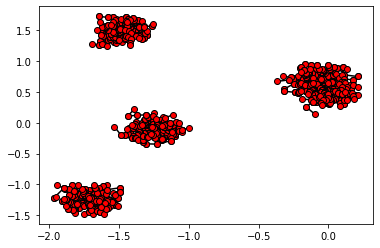

In [16]:
cluster_edges = np.array(single_linkage(num_clusters))
print(cluster_roots)


'''cluster = np.array(connected_nodes(clusters[int(i)]))
plt.plot(x[cluster.T], y[cluster.T], linestyle='-', color='black',
        markerfacecolor= 'red', marker='o')
    '''

plt.plot(x[cluster_edges.T], y[cluster_edges.T], linestyle='-', color='black',
        markerfacecolor='red', marker='o')
plt.show()

# UMAP

In [17]:
def eq2():
    sum(exp() for i in range(1, k)) = math.log(k)

SyntaxError: cannot assign to function call (<ipython-input-17-7f42c27be1bd>, line 2)